---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.8 - Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

**Loading Data**

In [2]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/housing_LR.csv?raw=True",
                 index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


**Visualization**

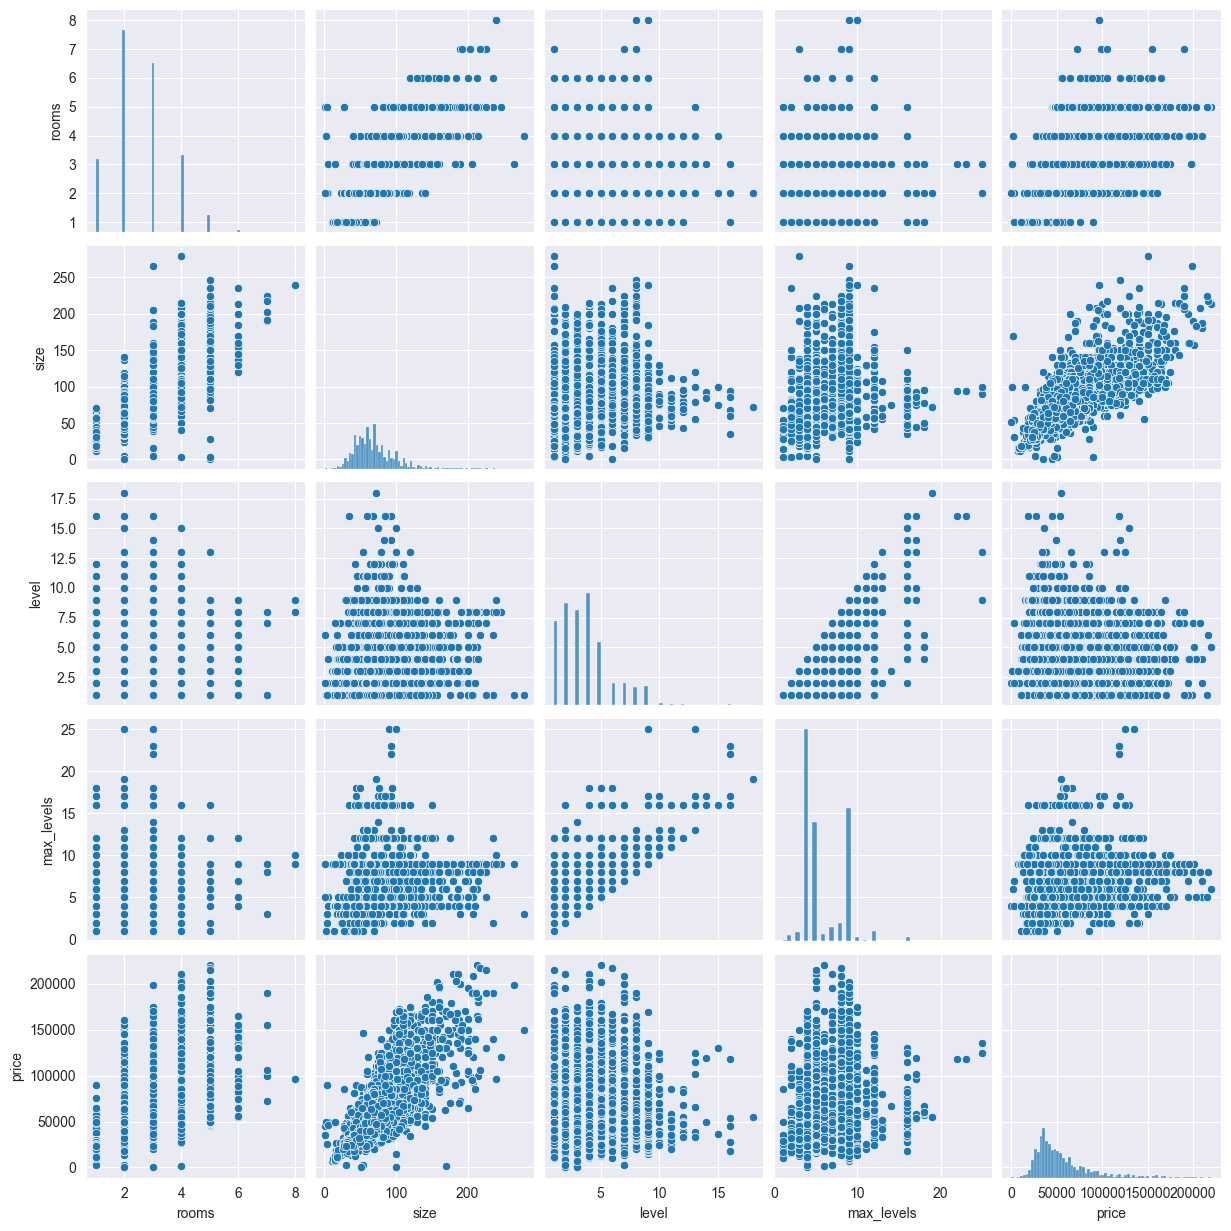

In [3]:
sns.pairplot(df[['rooms', 'size', 'level', 'max_levels', 'price']]);

In [4]:
df.corrwith(df['price'], numeric_only=True).sort_values(ascending=False)

price         1.000000
size          0.794788
rooms         0.609123
max_levels    0.254600
level         0.079509
dtype: float64

**Train & Test split**

In [5]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [6]:
housing = df[df['district']=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [7]:
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [8]:
print(f'{train_set.shape=}')
print(f'{test_set.shape=}')

train_set.shape=(1454, 6)
test_set.shape=(162, 6)


**Machine Learning**

In [9]:
# X_train = train_set[['rooms', 'size', 'level', 'max_levels']]
# X_train = train_set[['size', 'rooms']]
X_train = train_set[['size', 'max_levels']]
y_train = train_set['price']

In [10]:
MLR_model = linear_model.LinearRegression()
MLR_model.fit(X_train, y_train)

# Coefficients (theta1, theta2, ...)
print("Coefficients:", MLR_model.coef_)
print("theta0:", MLR_model.intercept_)

Coefficients: [ 747.04795007 -393.4032521 ]
theta0: 1341.5753441394045


**Evaluation**

In [11]:
# X_test = test_set[['rooms', 'size', 'level', 'max_levels']]
# X_test = test_set[['size', 'rooms']]
X_test = test_set[['size', 'max_levels']]
y_test = test_set['price']

y_pred = MLR_model.predict(X_test)

In [12]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'{MAE=}')
print(f'{RMSE=}')

MAE=7193.92237806578
RMSE=12635.660248895361


**RESULTS:**

---
**X predicotrs:** ['size', 'max_levels']
**MAE**=7193.92237806578
**RMSE**=12635.660248895361

---
**X predicotrs:** ['rooms', 'size', 'level', 'max_levels']
**MAE**=7409.794634553287
**RMSE**=12249.735537524299

---
**X predicotrs:** ['size', 'rooms']
**MAE**=7510.17122355935
**RMSE**=12912.529056996824

---